# Mie Scattering Function

**Scott Prahl**

**May 2024**

Mie scattering describes the special case of the interaction of light passing through a non-absorbing medium with a single embedded spherical object. The sphere itself can be non-absorbing, moderately absorbing, or perfectly absorbing.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import miepython

%config InlineBackend.figure_format = 'retina'

In [7]:
help(miepython.mie)

Help on function mie in module miepython.miepython:

mie(m, x)
    Calculate the efficiencies for a sphere where m or x may be arrays.

    Args:
        m: the complex index of refraction of the sphere
        x: the size parameter of the sphere

    Returns:
        qext: the total extinction efficiency
        qsca: the scattering efficiency
        qback: the backscatter efficiency
        g: the average cosine of the scattering phase function



## Goals for this notebook:

* show how to plot the phase function
* explain the units for the scattering phase function
* show a few examples from classic Mie texts


## Geometry

Specifically, the scattering function $p(\theta_i,\phi_i,\theta_o,\phi_o)$ describes the amount of light scattered by a particle for light incident at an angle $(\theta_i,\phi_i)$ and exiting the particle (in the far field) at an angle $(\theta_o,\phi_o)$.  For simplicity, the scattering function is often assumed to be rotationally symmetric (it is, obviously, for spherical scatterers) and that the angle that the light is scattered into only depends the $\theta=\theta_o-\theta_i$.  In this case, the scattering function can be written as $p(\theta)$.  Finally, the angle is often replaced by $\mu=\cos\theta$ and therefore the phase function becomes just $p(\mu)$.

The figure below shows the basic idea.  An incoming monochromatic plane wave hits a sphere and produces *in the far field* two separate monochromatic waves — a slightly attenuated unscattered planar wave and an outgoing spherical wave.

Obviously. the scattered light will be cylindrically symmetric about the ray passing through the center of the sphere.

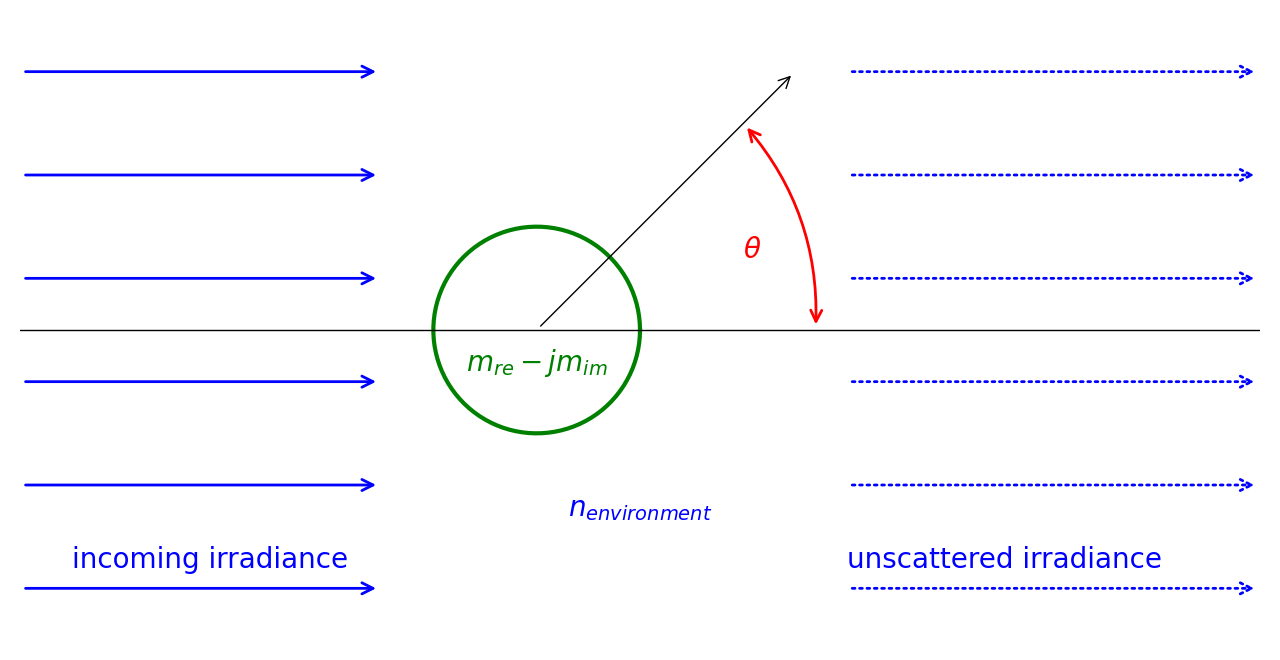

In [2]:
fs = 10 # fontsize
t = np.linspace(0,2*np.pi,100)
xx = np.cos(t)
yy = np.sin(t)

plt.figure(figsize=(8,4.5))
plt.gca().set_aspect('equal')
plt.plot(xx,yy, color='green')
plt.axhline(0, color='black', lw=0.5)

plt.annotate('incoming irradiance', xy=(-4.5,-2.3),ha='left',color='blue',fontsize=fs)
for i in range(6):
    y0 = i -2.5
    plt.annotate('',xy=(-1.5,y0),xytext=(-5,y0),arrowprops=dict(arrowstyle="->",color='blue'))

plt.annotate('unscattered irradiance', xy=(3,-2.3),ha='left',color='blue',fontsize=fs)
for i in range(6):
    y0 = i -2.5
    plt.annotate('',xy=(7,y0),xytext=(3,y0),arrowprops=dict(arrowstyle="->",color='blue',ls=':'))

#plt.text(0, 1.5, 'scattered\nspherical\nwave', ha='left', color='red', fontsize=fs)
plt.annotate('',xy=(2.5,2.5),xytext=(0,0),arrowprops=dict(arrowstyle="->",color='black', lw=0.5))
plt.annotate(r'$\theta$',xy=(2,0.7),color='red',fontsize=fs)
plt.annotate('',xy=(2,2),xytext=(2.7,0),arrowprops=dict(connectionstyle="arc3,rad=0.2", arrowstyle="<->",color='red'))
plt.text(0,-0.4,'$m_{re}-j m_{im}$',ha='center', color='green',fontsize=fs)
plt.text(1,-1.8,'$n_{environment}$',ha='center',color='blue',fontsize=fs)
plt.xlim(-5,7)
plt.ylim(-3,3)
plt.axis('off')
#plt.savefig('mie-diagram1.png', dpi=300, transparent=True)
#plt.savefig('mie-diagram1.svg')
plt.show()

## Scattered Wave

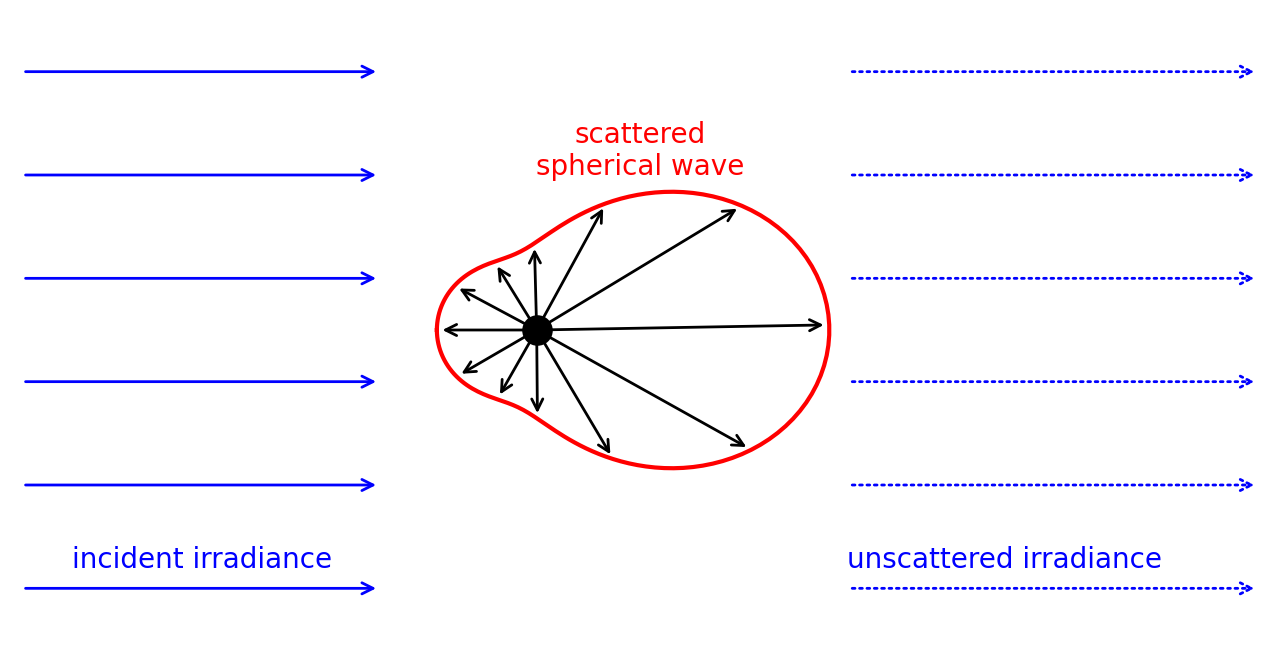

In [3]:
fs = 10 # fontsize
plt.figure(figsize=(8,4.5))
plt.gca().set_aspect('equal')

m = 1.5
x = np.pi/3
theta = np.linspace(-180,180,180)
theta_r = np.radians(theta)

mu = np.cos(theta_r)
scat = 15 * miepython.i_unpolarized(m,x,mu)

plt.plot(scat*np.cos(theta/180*np.pi),scat*np.sin(theta/180*np.pi), color='red')
for i in range(12):
    ii = i*15
    xx = scat[ii]*np.cos(theta_r[ii])
    yy = scat[ii]*np.sin(theta_r[ii])
#    print(xx,yy)
    plt.annotate('',xy=(xx,yy),xytext=(0,0),arrowprops=dict(arrowstyle="->",color='black'))
    

plt.annotate('incident irradiance', xy=(-4.5,-2.3),ha='left',color='blue',fontsize=fs)
for i in range(6):
    y0 = i -2.5
    plt.annotate('',xy=(-1.5,y0),xytext=(-5,y0),arrowprops=dict(arrowstyle="->",color='blue'))

plt.annotate('unscattered irradiance', xy=(3,-2.3),ha='left',color='blue',fontsize=fs)
for i in range(6):
    y0 = i -2.5
    plt.annotate('',xy=(7,y0),xytext=(3,y0),arrowprops=dict(arrowstyle="->",color='blue',ls=':'))

plt.annotate('scattered\nspherical wave', xy=(1,1.5), ha='center', color='red', fontsize=fs)
plt.plot([0],[0], 'ok', markersize=10)

plt.xlim(-5,7)
plt.ylim(-3,3)
plt.axis('off')
#plt.savefig('mie-diagram2.png', dpi=300, transparent=True)
#plt.savefig('mie-diagram2.svg')

plt.show()

## Normalization of the scattered light

By default the scattering function is normalized so that the integral over all angles will be the single scattering albedo.

$$
a = \frac{Q_\mathrm{sca}}{Q_\mathrm{ext}} = \frac{Q_\mathrm{sca}}{Q_\mathrm{sca}+Q_\mathrm{abs}}
$$

So the scattering function or phase function has at least three reasonable normalizations that involve integrating over all $4\pi$ steradians.  Below $d\Omega=\sin\theta d\theta\,d\phi$ is a differential solid angle

$$
\int_{4\pi} p(\theta,\phi) \,d\Omega = a  \qquad\qquad \mbox{default normalization}
$$

See <https://miepython.readthedocs.io/en/latest/03a_normalization.html> for details about other normalization options.


## Examples

### Unpolarized Scattering Function

If unpolarized light hits the sphere, then there are no polarization effects to worry about.  It is pretty easy to generate a plot to show how scattering changes with angle.

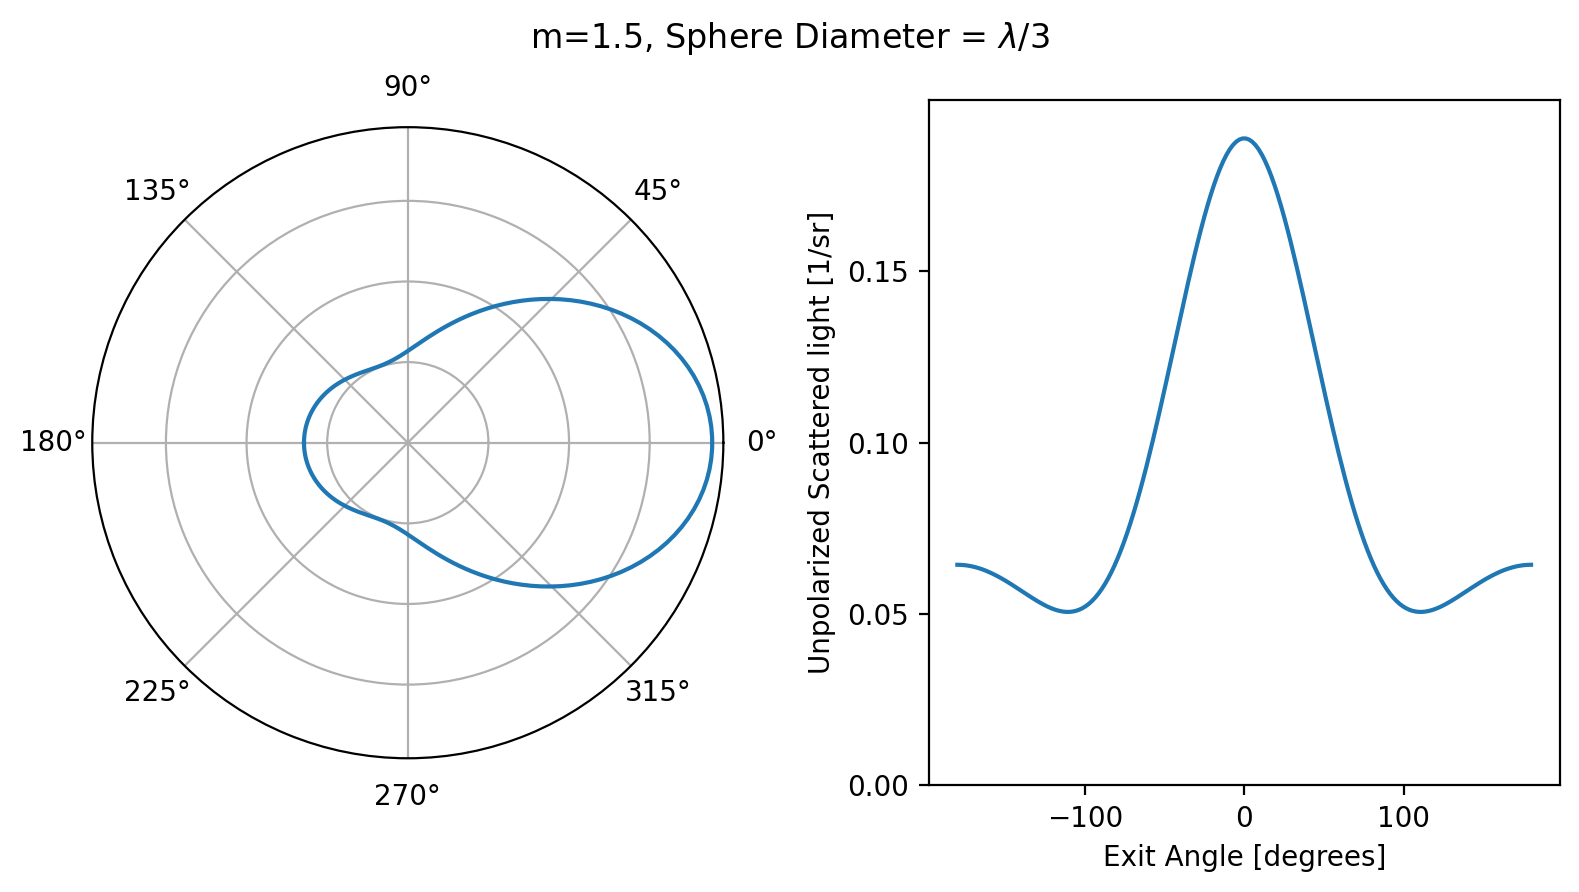

In [4]:
m = 1.5
x = np.pi/3
theta = np.linspace(-180, 180, 180)
mu = np.cos(theta / 180 * np.pi)
scat = miepython.i_unpolarized(m, x, mu)

plt.figure(figsize=(8, 4.5))
plt.suptitle(r"m=1.5, Sphere Diameter = $\lambda$/3")

#fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
plt.subplot(121, projection='polar')
plt.plot(np.radians(theta), scat)
plt.gca().set_rticks([0.05, 0.1, 0.15])
plt.gca().set_yticklabels([])  # omit radial labels

# Cartesian plot
plt.subplot(122)
plt.plot(theta, scat)
plt.xlabel('Exit Angle [degrees]')
plt.ylabel('Unpolarized Scattered light [1/sr]')
plt.yticks([0,0.05,0.1,0.15])
plt.ylim(0.00, 0.2)

plt.tight_layout()
plt.show()

A similar calculation but using `ez_intensities()`

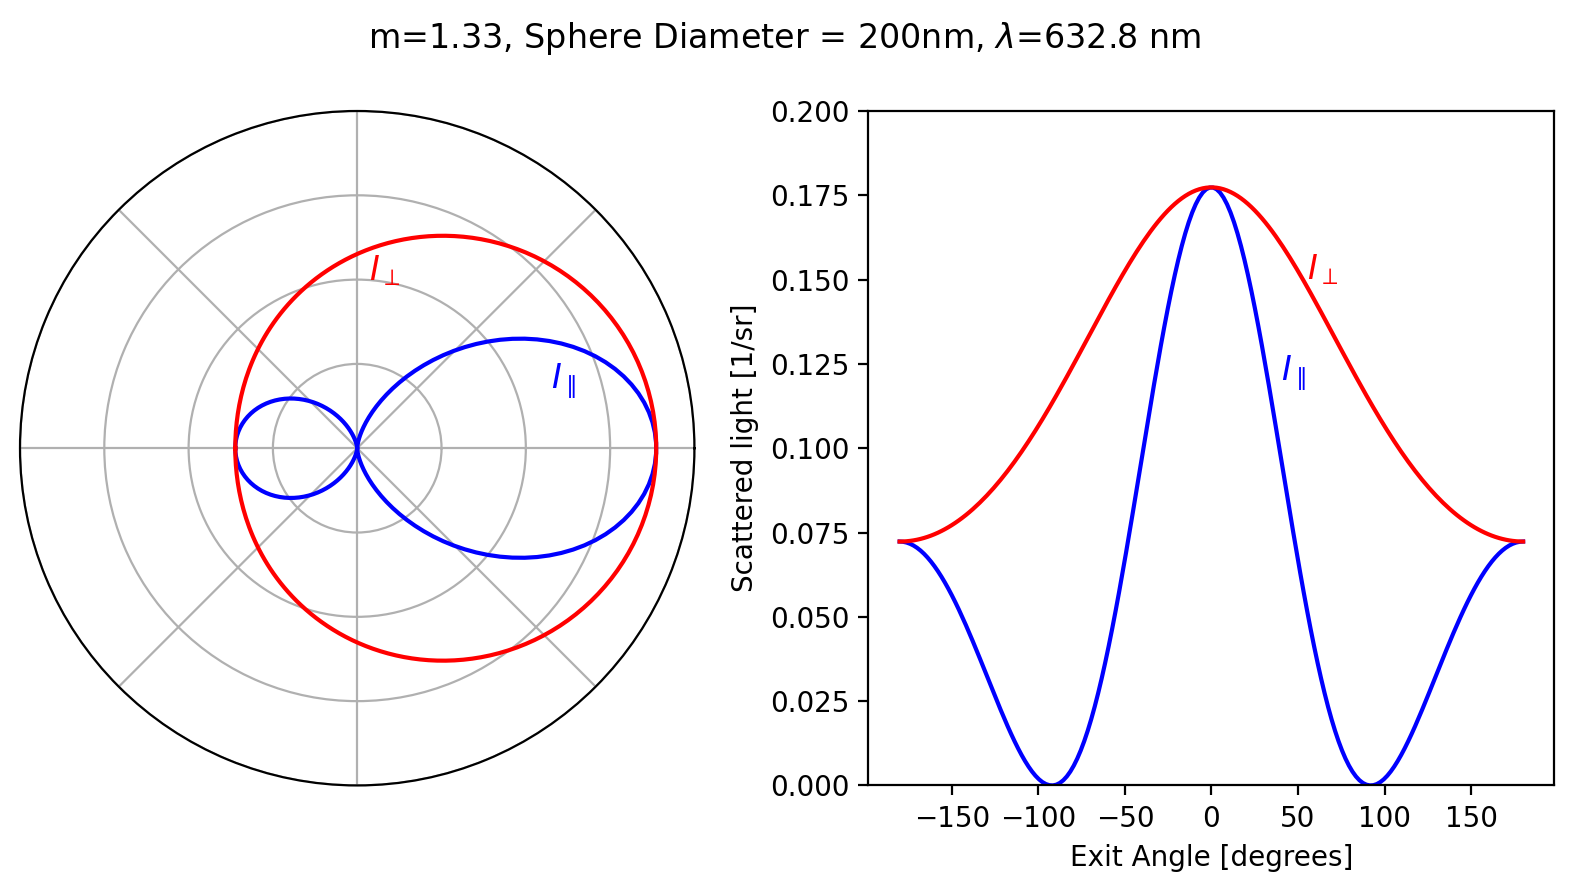

In [5]:
m = 1.33
lambda0 = 632.8 # nm
d = 200        # nm

theta = np.linspace(-180,180,180)
mu = np.cos(theta/180*np.pi)

Ipar, Iper = miepython.ez_intensities(m, d, lambda0, mu)

plt.figure(figsize=(8, 4.5))
plt.suptitle(r"m=%.2f, Sphere Diameter = %.0fnm, $\lambda$=%.1f nm" % (m, d, lambda0))

plt.subplot(121, projection='polar')
plt.plot(np.radians(theta), Ipar, color='blue')
plt.text(0.3, 0.12, r'$I_\parallel$', fontsize=12, color='blue')
plt.plot(np.radians(theta), Iper, color='red')
plt.text(1.5, 0.10, r'$I_\perp$', fontsize=12, color='red')
plt.gca().set_rticks([0.05, 0.1, 0.15, 0.20]) 
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels([])

plt.subplot(122)
plt.plot(theta, Ipar, color='blue')
plt.text(40, 0.12, r'$I_\parallel$', fontsize=12, color='blue')
plt.plot(theta, Iper, color='red')
plt.text(55, 0.15, r'$I_\perp$', fontsize=12, color='red')

plt.xlabel('Exit Angle [degrees]')
plt.ylabel('Scattered light [1/sr]')
plt.ylim(0.00,0.2)

plt.tight_layout()
plt.show()

### Rayleigh Scattering

Classic Rayleigh scattering treats small particles with natural (unpolarized) light.  
The solid black line denotes the total scattered intensity. The red dashed line is light scattered that is polarized perpendicular to the plane of the graph and the blue dotted line is for light parallel to the plane of the graph. (Compare with van de Hult, Figure 10)

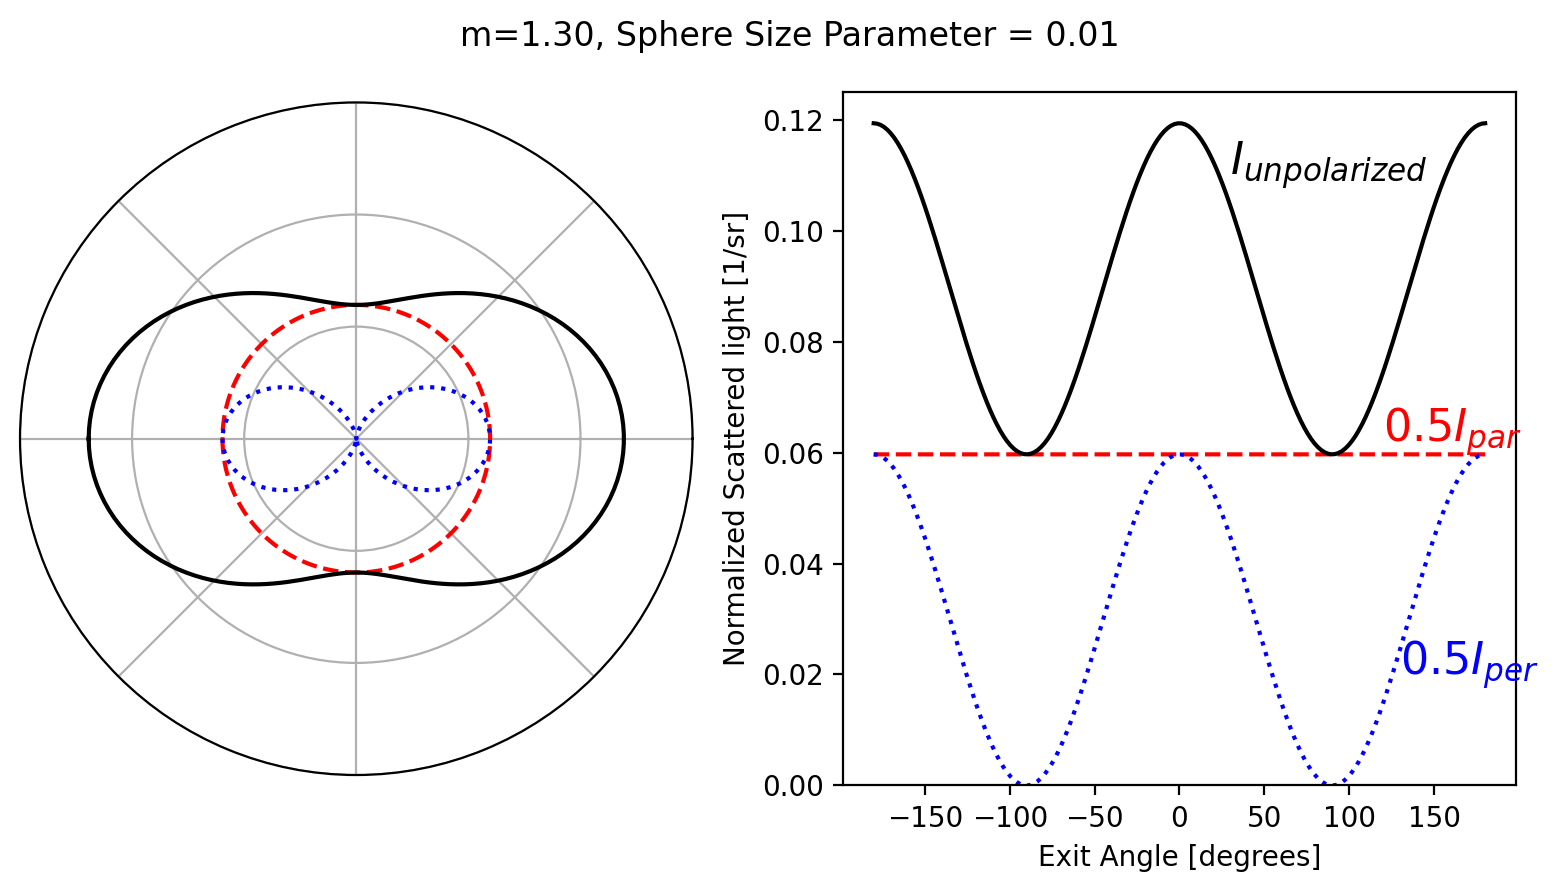

In [6]:
m = 1.3
x = 0.01
theta = np.linspace(-180,180,180)
mu = np.cos(theta/180*np.pi)
ipar = miepython.i_par(m,x,mu)/2
iper = miepython.i_per(m,x,mu)/2
iun  = miepython.i_unpolarized(m,x,mu)

plt.figure(figsize=(8, 4.5))
plt.suptitle('m=%.2f, Sphere Size Parameter = %.2f' %(m,x))

plt.subplot(121, projection='polar')

plt.subplot(121, projection='polar')
plt.plot(theta/180*np.pi, iper, 'r--')
plt.plot(theta/180*np.pi, ipar, 'b:')
plt.plot(theta/180*np.pi, iun, 'k')

plt.gca().set_rticks([0.05, 0.1,0.15]) 
plt.gca().set_yticklabels([])
plt.gca().set_xticklabels([])

#plt.title('m=%.2f, Sphere Parameter = %.2f' %(m,x))

plt.subplot(122)
plt.plot(theta,iper,'r--')
plt.plot(theta,ipar,'b:')
plt.plot(theta,iun,'k')

plt.xlabel('Exit Angle [degrees]')
plt.ylabel('Normalized Scattered light [1/sr]')
plt.ylim(0.00,0.125)
plt.text(130,0.02,r"$0.5I_{per}$",color="blue", fontsize=16)
plt.text(120,0.062,r"$0.5I_{par}$",color="red", fontsize=16)
plt.text(30,0.11,r"$I_{unpolarized}$",color="black", fontsize=16)

plt.tight_layout()

plt.show()